<a href="https://colab.research.google.com/github/AnaFerreira015/dip-2024-2/blob/main/Morfologia_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 – Dilatação / Erosão em escala de cinza

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving horse.png to horse.png


In [3]:
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [5]:
dilated = cv2.dilate(gray, kernel)
eroded = cv2.erode(gray, kernel)

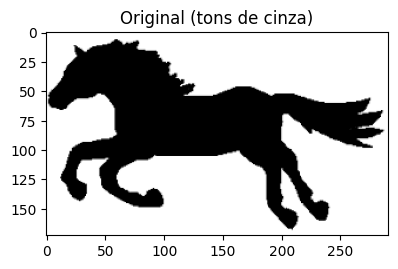

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original (tons de cinza)")
plt.imshow(gray, cmap='gray')

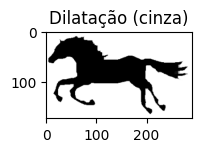

In [7]:
plt.subplot(1, 3, 2)
plt.title("Dilatação (cinza)")
plt.imshow(dilated, cmap='gray')

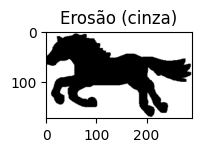

In [8]:
plt.subplot(1, 3, 3)
plt.title("Erosão (cinza)")
plt.imshow(eroded, cmap='gray')
plt.show()

As operações morfológicas em tons de cinza foram aplicadas utilizando um elemento estruturante retangular de 5×5. A dilatação clareou regiões destacando estruturas claras, enquanto a erosão escureceu detalhes, suavizando contornos finos.

# 4.2 – Abertura / Fechamento em escala de cinza

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [10]:
opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

In [11]:
closed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

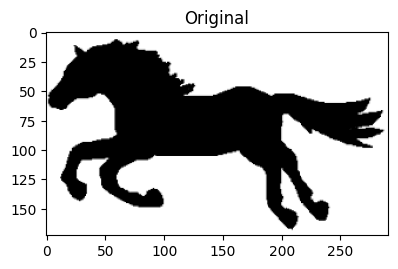

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')

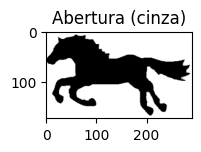

In [13]:
plt.subplot(1, 3, 2)
plt.title("Abertura (cinza)")
plt.imshow(opened, cmap='gray')

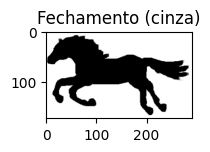

In [14]:
plt.subplot(1, 3, 3)
plt.title("Fechamento (cinza)")
plt.imshow(closed, cmap='gray')
plt.show()

A abertura e fechamento foram aplicados em imagem em tons de cinza para suavização morfológica. A abertura removeu pequenos elementos brilhantes (ruídos ou reflexos), enquanto o fechamento preencheu regiões escuras pequenas (sombras ou falhas locais).

# 4.3 – Atualização morfológica (ou reconstrução por atualização)

In [15]:
marker = cv2.erode(gray, kernel, iterations=3)
mask = gray.copy()

In [16]:
reconstructed = marker.copy()

In [17]:
while True:
    dilated = cv2.dilate(reconstructed, kernel)
    updated = np.minimum(dilated, mask)
    if np.array_equal(updated, reconstructed):
        break
    reconstructed = updated

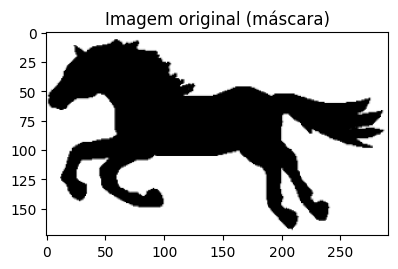

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Imagem original (máscara)")
plt.imshow(mask, cmap='gray')

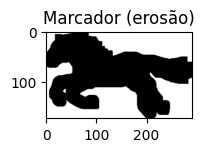

In [19]:
plt.subplot(1, 3, 2)
plt.title("Marcador (erosão)")
plt.imshow(marker, cmap='gray')

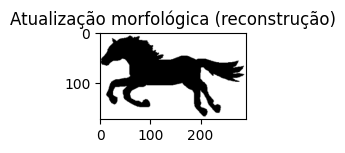

In [20]:
plt.subplot(1, 3, 3)
plt.title("Atualização morfológica (reconstrução)")
plt.imshow(reconstructed, cmap='gray')
plt.show()

A atualização morfológica foi implementada como uma reconstrução iterativa por dilatação, onde a imagem erodida serve de marcador e a imagem original é a máscara. O processo converge para uma imagem reconstruída com base em restrições morfológicas em tons de cinza.

# 4.4 – Gradiente Morfológico

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [22]:
dilated = cv2.dilate(gray, kernel)
eroded = cv2.erode(gray, kernel)

In [23]:
gradient = cv2.subtract(dilated, eroded)

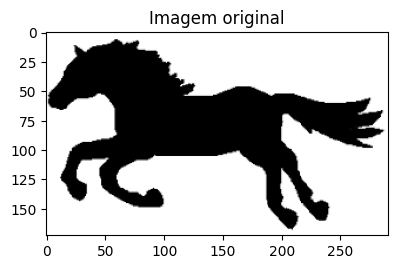

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Imagem original")
plt.imshow(gray, cmap='gray')

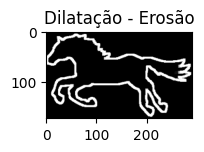

In [25]:
plt.subplot(1, 3, 2)
plt.title("Dilatação - Erosão")
plt.imshow(gradient, cmap='gray')

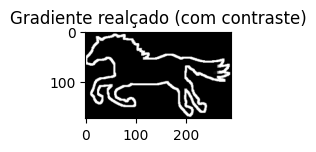

In [26]:
plt.subplot(1, 3, 3)
plt.title("Gradiente realçado (com contraste)")
plt.imshow(cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
plt.show()

O gradiente morfológico evidencia as transições de intensidade nos contornos da imagem, sendo calculado como a diferença entre a dilatação e a erosão. É uma técnica eficaz para realce de bordas em imagens em tons de cinza.

# 4.5 – Top-Hat e Bottom-Hat

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

In [28]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

In [29]:
bothat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

In [30]:
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

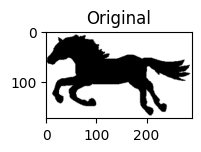

In [31]:
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')

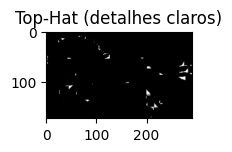

In [32]:
plt.subplot(1, 3, 2)
plt.title("Top-Hat (detalhes claros)")
plt.imshow(tophat, cmap='gray')

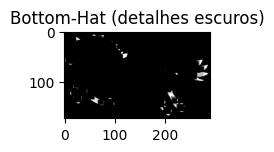

In [33]:
plt.subplot(1, 3, 3)
plt.title("Bottom-Hat (detalhes escuros)")
plt.imshow(bothat, cmap='gray')
plt.show()

As operações Top-Hat e Bottom-Hat foram aplicadas com um elemento estruturante maior para destacar detalhes locais da imagem. O Top-Hat evidenciou estruturas mais claras do que o fundo, enquanto o Bottom-Hat realçou detalhes escuros. Ambas são úteis na análise de texturas e pré-processamento para segmentação.

# 4.6 – Granulometria

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [35]:
sizes = range(1, 15)
responses = []

In [36]:
for r in sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*r+1, 2*r+1))
    opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    responses.append(np.sum(opened))

In [37]:
responses = np.array(responses, dtype=np.float32)
responses = (responses.max() - responses) / (responses.max() - responses.min())

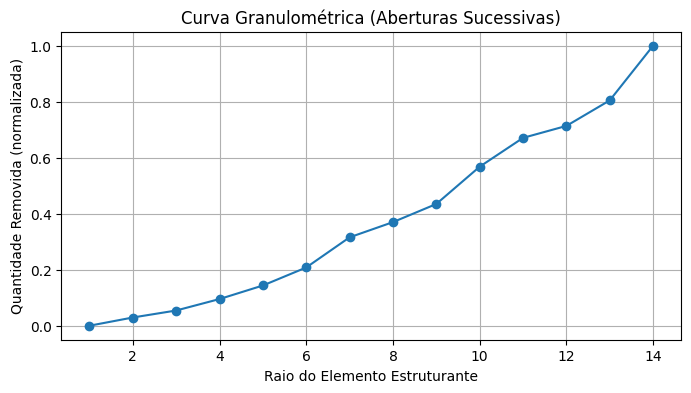

In [38]:
plt.figure(figsize=(8, 4))
plt.title("Curva Granulométrica (Aberturas Sucessivas)")
plt.plot(sizes, responses, marker='o')
plt.xlabel("Raio do Elemento Estruturante")
plt.ylabel("Quantidade Removida (normalizada)")
plt.grid(True)
plt.show()

A granulometria foi realizada aplicando-se aberturas morfológicas sucessivas com elementos estruturantes de tamanho crescente. A quantidade de informação removida em cada etapa foi medida, gerando uma curva granulométrica que caracteriza o tamanho predominante das estruturas na imagem.

# 4.7 – Segmentação de Texturas

In [39]:
kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_large = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

In [40]:
tophat_small = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel_small)
tophat_large = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel_large)

In [41]:
texture_diff = cv2.absdiff(tophat_small, tophat_large)

In [42]:
_, texture_mask = cv2.threshold(texture_diff, 15, 255, cv2.THRESH_BINARY)

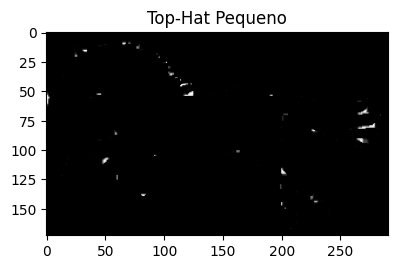

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Top-Hat Pequeno")
plt.imshow(tophat_small, cmap='gray')

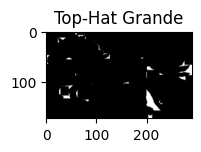

In [44]:
plt.subplot(1, 3, 2)
plt.title("Top-Hat Grande")
plt.imshow(tophat_large, cmap='gray')

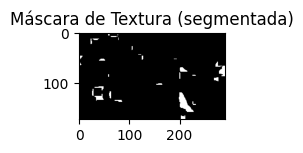

In [45]:
plt.subplot(1, 3, 3)
plt.title("Máscara de Textura (segmentada)")
plt.imshow(texture_mask, cmap='gray')
plt.show()

A segmentação de texturas foi realizada comparando-se a resposta do operador Top-Hat com elementos estruturantes de tamanhos diferentes. A diferença entre as respostas evidencia variações locais de textura, possibilitando sua segmentação morfológica.